In [1]:
# import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Create a DataFrame with the given entries
data = {
    'Country': ['USA', 'Canada', 'France', 'UK', 'Germany', 'Australia'],
    'Latitude': [44.97, 62.4, 46.75, 54.01, 51.15, -25.45],
    'Longitude': [-103.77, -96.8, 2.4, -2.53, 10.4, 133.11],
    'Language': ['English', 'English', 'French', 'English', 'German', 'English']
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('Countryclusters.csv', index=False)

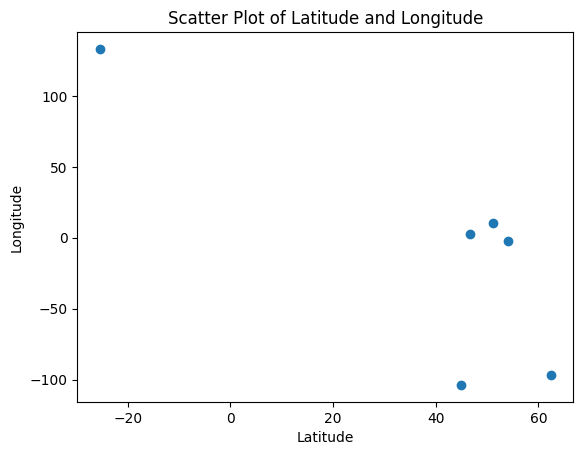

In [3]:
# Load and visualize the data
x = df[['Latitude', 'Longitude']]
# Visualize the scatter plot of Longitude and Latitude
plt.scatter(x['Latitude'], x['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude and Longitude')
plt.show()

In [4]:
# Train KMeans model on x
kmeans = KMeans(n_clusters=3)  # choose a value for K
kmeans.fit(x)
# Predict on x
labels = kmeans.labels_

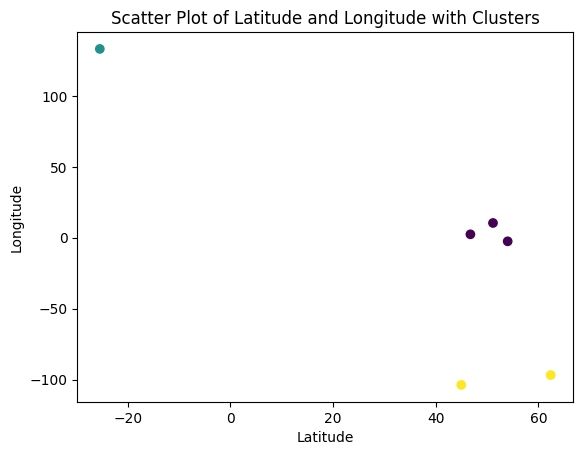

In [5]:
# Visualize the scatter plot of Longitude and Latitude with clusters identification
plt.scatter(x['Latitude'], x['Longitude'], c=labels)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude and Longitude with Clusters')
plt.show()

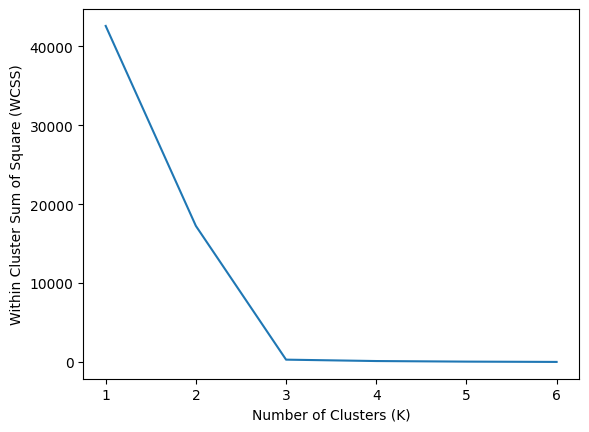

In [6]:
# Perform an elbow method using multiple values of K on x-axis and WCSS (within cluster sum of square)
wcss = []
for i in range(1, len(x) + 1):  # try K from 1 to the number of samples
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, len(x) + 1), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Sum of Square (WCSS)');

# Part 2


In [7]:
df = pd.read_csv("D:/junotbok/7th week/KMean_clustering.csv")

In [8]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [9]:
df.shape

(7050, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [11]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [12]:
# drop redundant columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [13]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [14]:
# View how many different types of variables are there
print(df.dtypes.value_counts())

# View the labels in the variable
print(df['status_type'].value_counts())

# View how many different types of variables are there
print(df['status_published'].dtypes)

# View the labels in the variable
print(df['status_published'].head())

int64     9
object    3
Name: count, dtype: int64
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64
object
0     4/22/2018 6:00
1    4/21/2018 22:45
2     4/21/2018 6:17
3     4/21/2018 2:29
4     4/18/2018 3:22
Name: status_published, dtype: object


In [15]:
# declar features and target
features = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(features_scaled)

KMeans(n_clusters=3)

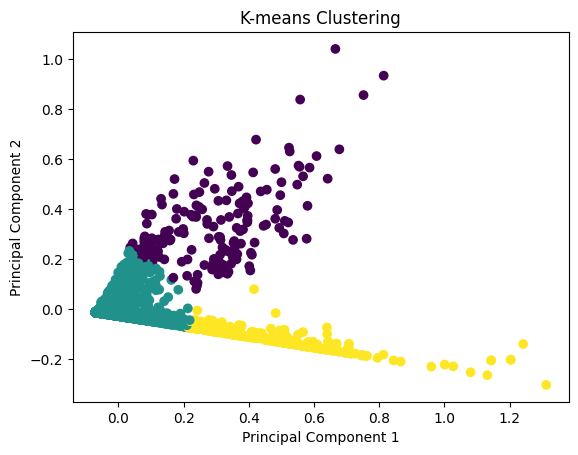

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()

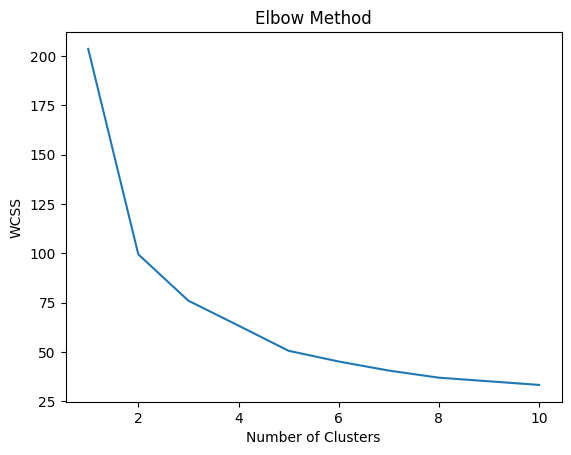

In [19]:
wcss = []
for i in range(1, 11):
    kmeans_temp = KMeans(n_clusters=i)
    kmeans_temp.fit(features_scaled)
    wcss.append(kmeans_temp.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

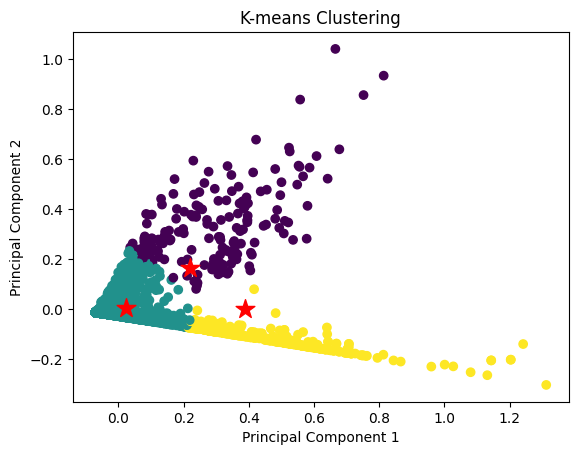

In [20]:
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()

In [21]:
print("Number of clusters:", kmeans.n_clusters)
print("Cluster labels:", kmeans.labels_)

Number of clusters: 3
Cluster labels: [1 1 1 ... 1 1 1]
